In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

mp.rcParams['axes.unicode_minus'] = False

In [2]:
fm = mp.font_manager.FontManager()
plt.rcParams["font.family"] = 'Malgun Gothic'

In [3]:
df_acc = pd.read_csv('./data/04_범죄유형별 소년범죄자 공범관계_홍상석1.csv', thousands = ',')
df_acc.head(10)

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,계.5,계.6,계.7,계.8,계.9,계.10,계.11,계.12
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
5,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
6,4,2018년,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
7,5,2018년,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927
8,6,2018년,형법범,재산범죄,손괴,940,648,190,67,0,0,0,0,94,3,1,25,102
9,7,2018년,형법범,재산범죄,장물,290,179,100,35,1,0,3,0,43,0,2,16,11


In [4]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      123 non-null    object
 1   자료시점    123 non-null    object
 2   분류      123 non-null    object
 3   분류.1    123 non-null    object
 4   분류.2    123 non-null    object
 5   계       123 non-null    object
 6   계.1     123 non-null    object
 7   계.2     123 non-null    object
 8   계.3     123 non-null    object
 9   계.4     123 non-null    object
 10  계.5     123 non-null    object
 11  계.6     123 non-null    object
 12  계.7     123 non-null    object
 13  계.8     123 non-null    object
 14  계.9     123 non-null    object
 15  계.10    123 non-null    object
 16  계.11    123 non-null    object
 17  계.12    123 non-null    object
dtypes: object(18)
memory usage: 17.4+ KB


In [5]:
# 현재 데이터에 column명을 확인 가능
df_acc.columns

Index(['No', '자료시점', '분류', '분류.1', '분류.2', '계', '계.1', '계.2', '계.3', '계.4',
       '계.5', '계.6', '계.7', '계.8', '계.9', '계.10', '계.11', '계.12'],
      dtype='object')

In [6]:
# columns의 이름을 변경함
df_acc = df_acc.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계':'총합계',
                                              '계.1':'단독범','계.2':'공범 소계', '계.3':'학교동창', '계.4':'교도소,소년원친구',
                                              '계.5':'직장동료','계.6':'친인척','계.7':'군동료','계.8':'동네친구',
                                              '계.9':'고향친구','계.10':'애인','계.11':'기타','계.12':'미상'})

In [7]:
# string을 숫자로 바꾸기             이유: 파일을 불러올때 thousand 명령어가 읽히지 않아서 여기서 다시 함
thousands = ['대분류', '중분류', '소분류', '총합계', '단독범', '공범 소계', '학교동창', '교도소,소년원친구',
               '직장동료', '친인척', '군동료', '동네친구', '고향친구', '애인', '기타', '미상']
 
for thousand in thousands:
    df_acc[thousand]=df_acc[thousand].str.replace(',','')

In [8]:
# case = False 는 대소문자 구분 없이 찾는다 na = nan도 표기해준다
df_acc_check = df_acc[df_acc["소분류"].str.contains("입력치", case=False, na=True)]
df_acc_check

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,1,2018년,계,계[입력치],계[입력치],66142,31713,27554,9543,195,63,234,2,12711,551,471,3784,6875
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],54205,22845,25818,9100,188,46,224,2,11963,535,430,3330,5542
5,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],26497,9988,14970,4898,170,17,100,1,7217,311,307,1949,1539
12,10,2018년,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],3509,2430,730,264,4,0,3,1,325,16,8,109,349
17,15,2018년,형법범,강력범죄(폭력),강력범죄(폭력)의 계[입력치],19742,8080,8819,3444,10,23,110,0,3889,179,90,1074,2843
26,24,2018년,형법범,위조범죄,위조범죄의 계[입력치],1511,975,465,150,3,0,2,0,201,8,11,90,71
31,29,2018년,형법범,공무원범죄,공무원범죄의 계[입력치],3,0,1,0,0,0,0,0,0,0,0,1,2
36,34,2018년,형법범,풍속범죄,풍속범죄의 계[입력치],223,135,25,1,0,0,0,0,11,0,0,13,63
40,38,2018년,형법범,과실범죄,과실범죄의 계[입력치],157,91,41,24,0,0,0,0,11,2,0,4,25
44,42,2018년,형법범,기타형법범죄,기타형법범죄의 계[입력치],2563,1146,767,319,1,6,9,0,309,19,14,90,650


In [9]:
# 열 삭제
df_acc = df_acc.drop(['No','자료시점'], axis='columns')

In [10]:
# 행 삭제
df_acc = df_acc.drop(index = [0,1,2])

In [11]:
df_acc['총합계'] = df_acc['총합계'].astype(float)
df_acc['단독범'] = df_acc['단독범'].astype(float)
df_acc['공범 소계'] = df_acc['공범 소계'].astype(float)
df_acc['학교동창'] = df_acc['학교동창'].astype(float)
df_acc['교도소,소년원친구'] = df_acc['교도소,소년원친구'].astype(float)
df_acc['직장동료'] = df_acc['직장동료'].astype(float)
df_acc['친인척'] = df_acc['친인척'].astype(float)
df_acc['군동료'] = df_acc['군동료'].astype(float)
df_acc['동네친구'] = df_acc['동네친구'].astype(float)
df_acc['고향친구'] = df_acc['고향친구'].astype(float)
df_acc['애인'] = df_acc['애인'].astype(float)
df_acc['기타'] = df_acc['기타'].astype(float)
df_acc['미상'] = df_acc['미상'].astype(float)

In [12]:
# case = False 는 대소문자 구분 없이 찾는다 na = nan도 표기해준다
df_acc1 = df_acc[df_acc["소분류"].str.contains("입력치", case=False, na=True)]
df_acc1

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,계,계[입력치],계[입력치],66142.0,31713.0,27554.0,9543.0,195.0,63.0,234.0,2.0,12711.0,551.0,471.0,3784.0,6875.0
4,형법범,형법범계[입력치],형법범계[입력치],54205.0,22845.0,25818.0,9100.0,188.0,46.0,224.0,2.0,11963.0,535.0,430.0,3330.0,5542.0
5,형법범,재산범죄,재산범죄의 계[입력치],26497.0,9988.0,14970.0,4898.0,170.0,17.0,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],3509.0,2430.0,730.0,264.0,4.0,0.0,3.0,1.0,325.0,16.0,8.0,109.0,349.0
17,형법범,강력범죄(폭력),강력범죄(폭력)의 계[입력치],19742.0,8080.0,8819.0,3444.0,10.0,23.0,110.0,0.0,3889.0,179.0,90.0,1074.0,2843.0
26,형법범,위조범죄,위조범죄의 계[입력치],1511.0,975.0,465.0,150.0,3.0,0.0,2.0,0.0,201.0,8.0,11.0,90.0,71.0
31,형법범,공무원범죄,공무원범죄의 계[입력치],3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
36,형법범,풍속범죄,풍속범죄의 계[입력치],223.0,135.0,25.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,13.0,63.0
40,형법범,과실범죄,과실범죄의 계[입력치],157.0,91.0,41.0,24.0,0.0,0.0,0.0,0.0,11.0,2.0,0.0,4.0,25.0
44,형법범,기타형법범죄,기타형법범죄의 계[입력치],2563.0,1146.0,767.0,319.0,1.0,6.0,9.0,0.0,309.0,19.0,14.0,90.0,650.0


In [13]:
# 행 삭제
df_acc1 = df_acc1.drop(index = [3,4])

In [14]:
# not a number 확인
df_acc1.isnull().sum()

대분류          0
중분류          0
소분류          0
총합계          0
단독범          0
공범 소계        0
학교동창         0
교도소,소년원친구    0
직장동료         0
친인척          0
군동료          0
동네친구         0
고향친구         0
애인           0
기타           0
미상           0
dtype: int64

In [15]:
# df_acc1.dropna()                               not a number 제거

In [16]:
# column에 총범죄 횟수 추가      이유: 총 범죄 횟수 66142를 넣어서 단독범, 공범 소계, 미상의 전체 범죄수 대비 비율을 구함.
df_acc1.insert(9,'TNOC',[66142,66142,66142,66142,66142,66142,66142,66142,66142],True)                 #TNOC = total number of crime

In [17]:
df_acc1

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,TNOC,친인척,군동료,동네친구,고향친구,애인,기타,미상
5,형법범,재산범죄,재산범죄의 계[입력치],26497.0,9988.0,14970.0,4898.0,170.0,17.0,66142,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],3509.0,2430.0,730.0,264.0,4.0,0.0,66142,3.0,1.0,325.0,16.0,8.0,109.0,349.0
17,형법범,강력범죄(폭력),강력범죄(폭력)의 계[입력치],19742.0,8080.0,8819.0,3444.0,10.0,23.0,66142,110.0,0.0,3889.0,179.0,90.0,1074.0,2843.0
26,형법범,위조범죄,위조범죄의 계[입력치],1511.0,975.0,465.0,150.0,3.0,0.0,66142,2.0,0.0,201.0,8.0,11.0,90.0,71.0
31,형법범,공무원범죄,공무원범죄의 계[입력치],3.0,0.0,1.0,0.0,0.0,0.0,66142,0.0,0.0,0.0,0.0,0.0,1.0,2.0
36,형법범,풍속범죄,풍속범죄의 계[입력치],223.0,135.0,25.0,1.0,0.0,0.0,66142,0.0,0.0,11.0,0.0,0.0,13.0,63.0
40,형법범,과실범죄,과실범죄의 계[입력치],157.0,91.0,41.0,24.0,0.0,0.0,66142,0.0,0.0,11.0,2.0,0.0,4.0,25.0
44,형법범,기타형법범죄,기타형법범죄의 계[입력치],2563.0,1146.0,767.0,319.0,1.0,6.0,66142,9.0,0.0,309.0,19.0,14.0,90.0,650.0
61,특별법범,특별법범의 계[입력치],특별법범의 계[입력치],11937.0,8868.0,1736.0,443.0,7.0,17.0,66142,10.0,0.0,748.0,16.0,41.0,454.0,1333.0


In [18]:
# column 삭제                     대분류, 소분류 드랍
df_acc1 = df_acc1.drop(['대분류','소분류'], axis=1)

In [19]:
# 이름 변경                     column의 중분류 -> 범죄명으로
df_acc1 = df_acc1.rename(columns={'중분류':'범죄명'})

In [20]:
df_acc1

,범죄명,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,TNOC,친인척,군동료,동네친구,고향친구,애인,기타,미상
5,재산범죄,26497.0,9988.0,14970.0,4898.0,170.0,17.0,66142,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
12,강력범죄(흉악),3509.0,2430.0,730.0,264.0,4.0,0.0,66142,3.0,1.0,325.0,16.0,8.0,109.0,349.0
17,강력범죄(폭력),19742.0,8080.0,8819.0,3444.0,10.0,23.0,66142,110.0,0.0,3889.0,179.0,90.0,1074.0,2843.0
26,위조범죄,1511.0,975.0,465.0,150.0,3.0,0.0,66142,2.0,0.0,201.0,8.0,11.0,90.0,71.0
31,공무원범죄,3.0,0.0,1.0,0.0,0.0,0.0,66142,0.0,0.0,0.0,0.0,0.0,1.0,2.0
36,풍속범죄,223.0,135.0,25.0,1.0,0.0,0.0,66142,0.0,0.0,11.0,0.0,0.0,13.0,63.0
40,과실범죄,157.0,91.0,41.0,24.0,0.0,0.0,66142,0.0,0.0,11.0,2.0,0.0,4.0,25.0
44,기타형법범죄,2563.0,1146.0,767.0,319.0,1.0,6.0,66142,9.0,0.0,309.0,19.0,14.0,90.0,650.0
61,특별법범의 계[입력치],11937.0,8868.0,1736.0,443.0,7.0,17.0,66142,10.0,0.0,748.0,16.0,41.0,454.0,1333.0


In [21]:
# '범죄명'을 인덱스로 설정
df_acc1.set_index('범죄명', inplace = True)

In [22]:
# 소계 <--- 라는 글자 삭제
df_acc1 = df_acc1.rename(columns={'공범 소계': '공범'})

In [23]:
# [입력치] <--- 라는 글자 삭제
df_acc1 = df_acc1.rename(index={'특별법범의 계[입력치]': '특별법범의 계'})

In [24]:
df_acc1

,총합계,단독범,공범,학교동창,"교도소,소년원친구",직장동료,TNOC,친인척,군동료,동네친구,고향친구,애인,기타,미상
범죄명,,,,,,,,,,,,,,
재산범죄,26497.0,9988.0,14970.0,4898.0,170.0,17.0,66142,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
강력범죄(흉악),3509.0,2430.0,730.0,264.0,4.0,0.0,66142,3.0,1.0,325.0,16.0,8.0,109.0,349.0
강력범죄(폭력),19742.0,8080.0,8819.0,3444.0,10.0,23.0,66142,110.0,0.0,3889.0,179.0,90.0,1074.0,2843.0
위조범죄,1511.0,975.0,465.0,150.0,3.0,0.0,66142,2.0,0.0,201.0,8.0,11.0,90.0,71.0
공무원범죄,3.0,0.0,1.0,0.0,0.0,0.0,66142,0.0,0.0,0.0,0.0,0.0,1.0,2.0
풍속범죄,223.0,135.0,25.0,1.0,0.0,0.0,66142,0.0,0.0,11.0,0.0,0.0,13.0,63.0
과실범죄,157.0,91.0,41.0,24.0,0.0,0.0,66142,0.0,0.0,11.0,2.0,0.0,4.0,25.0
기타형법범죄,2563.0,1146.0,767.0,319.0,1.0,6.0,66142,9.0,0.0,309.0,19.0,14.0,90.0,650.0
특별법범의 계,11937.0,8868.0,1736.0,443.0,7.0,17.0,66142,10.0,0.0,748.0,16.0,41.0,454.0,1333.0


In [25]:
# 단독범 비율 구하기
df_acc1['단독범 비율'] = df_acc1.apply(lambda x: x['단독범']/x['TNOC']*100, axis=1).round(1).copy()

In [26]:
# 공범 소계 비율 비율 구하기
df_acc1['공범 비율'] = df_acc1.apply(lambda x: x['공범']/x['TNOC']*100, axis=1).round(1).copy()

In [27]:
# 미상 비율 구하기
df_acc1['미상 비율'] = df_acc1.apply(lambda x: x['미상']/x['TNOC']*100, axis=1).round(1).copy()

In [28]:
df_acc1

,총합계,단독범,공범,학교동창,"교도소,소년원친구",직장동료,TNOC,친인척,군동료,동네친구,고향친구,애인,기타,미상,단독범 비율,공범 비율,미상 비율
범죄명,,,,,,,,,,,,,,,,,
재산범죄,26497.0,9988.0,14970.0,4898.0,170.0,17.0,66142,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0,15.1,22.6,2.3
강력범죄(흉악),3509.0,2430.0,730.0,264.0,4.0,0.0,66142,3.0,1.0,325.0,16.0,8.0,109.0,349.0,3.7,1.1,0.5
강력범죄(폭력),19742.0,8080.0,8819.0,3444.0,10.0,23.0,66142,110.0,0.0,3889.0,179.0,90.0,1074.0,2843.0,12.2,13.3,4.3
위조범죄,1511.0,975.0,465.0,150.0,3.0,0.0,66142,2.0,0.0,201.0,8.0,11.0,90.0,71.0,1.5,0.7,0.1
공무원범죄,3.0,0.0,1.0,0.0,0.0,0.0,66142,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
풍속범죄,223.0,135.0,25.0,1.0,0.0,0.0,66142,0.0,0.0,11.0,0.0,0.0,13.0,63.0,0.2,0.0,0.1
과실범죄,157.0,91.0,41.0,24.0,0.0,0.0,66142,0.0,0.0,11.0,2.0,0.0,4.0,25.0,0.1,0.1,0.0
기타형법범죄,2563.0,1146.0,767.0,319.0,1.0,6.0,66142,9.0,0.0,309.0,19.0,14.0,90.0,650.0,1.7,1.2,1.0
특별법범의 계,11937.0,8868.0,1736.0,443.0,7.0,17.0,66142,10.0,0.0,748.0,16.0,41.0,454.0,1333.0,13.4,2.6,2.0


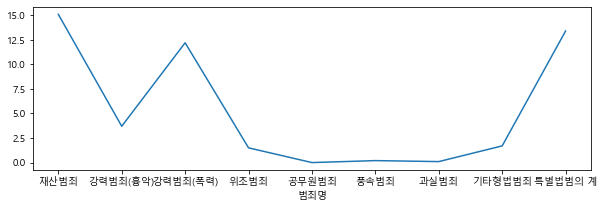

In [29]:
df_acc1['단독범 비율'].plot(kind='line', rot=0, figsize=(10, 3))
plt.show()

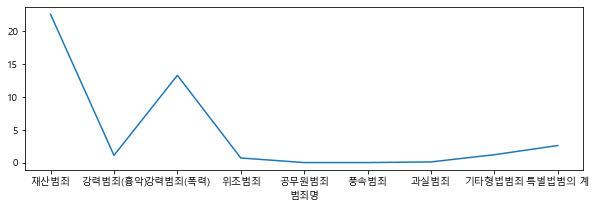

In [30]:
df_acc1['공범 비율'].plot(kind='line', rot=0, figsize=(10, 3))
plt.show()

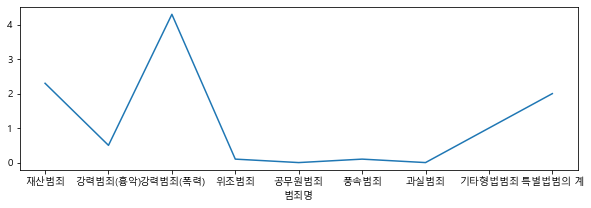

In [31]:
df_acc1['미상 비율'].plot(kind='line', rot=0, figsize=(10, 3))
plt.show()

In [32]:
%matplotlib qt
plt.style.use('ggplot')            # 백그라운드 눈끔

fig, ax1 = plt.subplots()          # 막대 그래프
ax2 = ax1.twinx()                  # 단독 범 비율 오른쪽 Y


ax1.set_ylim(0, 16000)
ax2.set_ylim(-1, 25)

gr1 = df_acc1.iloc[[0,1,2,3,4,5,6,7,8],[1,2,13]]
gr2 = df_acc1['단독범 비율']
gr3 = df_acc1['공범 비율']
gr4 = df_acc1['미상 비율']


gr1.plot(kind='bar', ax=ax1, label='소년 범죄자 수', rot=0, figsize=(15, 5), width=0.8, fontsize = 20,
         color=('#48818A','#49B77D','#729F19'))
gr2.plot(kind='line', color='red', label='단독범 비율', fontsize = 20, linewidth=2.0)
gr3.plot(kind='line', color='black', label='공범 비율', fontsize = 20, linewidth=2.0)
gr4.plot(kind='line', color='blue', label='미상 비율', fontsize = 20, linewidth=2.0)


ax1.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.2, 1.1),fontsize = 20)         # 막대
ax2.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.8, 1.1),fontsize = 20)         # 단독범 비율



plt.title("소년 범죄 공범 구분",fontsize = 25, color='blue')
ax1.set_xlabel("범죄명",fontsize = 20, color='blue')
ax1.set_ylabel("단위/명",fontsize = 20, color='blue')
ax2.set_ylabel("단위/%",fontsize = 20, color='blue')

Text(0, 0.5, '단위/%')

In [33]:
# 안쓰는 그래프
# df_acc1.groupby('범죄명')['단독범','공범','미상'].mean().plot.bar(figsize = (15,5))

# 1번) 범죄 카테고리 별로 '단독범, 공범소계, 미상'의 막대 그래프 &

# 전체 총범죄횟수 대비 '단독범, 공범소계, 미상'의 선 그래프

# .

# .

# .

# .

# .

In [34]:
df_acc

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,계,계[입력치],계[입력치],66142.0,31713.0,27554.0,9543.0,195.0,63.0,234.0,2.0,12711.0,551.0,471.0,3784.0,6875.0
4,형법범,형법범계[입력치],형법범계[입력치],54205.0,22845.0,25818.0,9100.0,188.0,46.0,224.0,2.0,11963.0,535.0,430.0,3330.0,5542.0
5,형법범,재산범죄,재산범죄의 계[입력치],26497.0,9988.0,14970.0,4898.0,170.0,17.0,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
119,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,특별법범,예비군법,예비군법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,특별법범,화물자동차운수사업법,화물자동차운수사업법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# case = False 는 대소문자 구분 없이 찾는다 na= nan도 표기해준다
df_acc2 = df_acc[~df_acc["소분류"].str.contains("입력치", case=False, na=True)].copy()
df_acc2

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
119,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,특별법범,예비군법,예비군법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,특별법범,화물자동차운수사업법,화물자동차운수사업법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# 범죄 1건 이상 일어난 리스트 보기                    범죄건수 0건 범죄명 거르기 (row 120번째 같은 예비군법 같은거 거르기)
df_acc2 = df_acc2[df_acc2['총합계'].copy()>=1].loc[:]
df_acc2

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,특별법범,출입국관리법,출입국관리법,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
115,특별법범,통신비밀보호법,통신비밀보호법,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116,특별법범,특가법(도주차량),특가법(도주차량),65.0,47.0,7.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,11.0
118,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [37]:
# 사용 안하는 그래프
# 1건 이상의 범죄 막대그래프 새창으로 보기
# %matplotlib qt
# df_acc2.groupby('소분류')['단독범','공범 소계','미상'].mean().plot.bar(width = 0.5)

# 2번) '공범 소계, 단독범, 미상'의 각종 범죄 막대 그래프

# .

# .

# .

# .

# .

In [38]:
# 1000건 이상의 범죄만 집계
df_acc3 = df_acc2[df_acc2['총합계'].copy()>=1000].loc[:]
df_acc3.head()

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
11,형법범,재산범죄,횡령,1393.0,958.0,370.0,144.0,0.0,1.0,4.0,0.0,152.0,8.0,8.0,53.0,65.0
16,형법범,강력범죄(흉악),성폭력,3173.0,2350.0,486.0,212.0,0.0,0.0,1.0,0.0,201.0,1.0,2.0,69.0,337.0
18,형법범,강력범죄(폭력),공갈,1791.0,663.0,1022.0,274.0,4.0,1.0,3.0,0.0,575.0,19.0,14.0,132.0,106.0


In [39]:
# 사용 안하는 그래프
# 1000건 이상의 범죄의 막대 그래프                     이유: 범죄목이 많아 1000건 이상의 큰 것만 그래프
# %matplotlib inline
# df_acc3.groupby('소분류')['단독범','공범 소계','미상'].mean().plot.bar(figsize=(15,5), width = 0.5, fontsize =13, rot =90)

# # gr1.plot(kind='bar', ax=ax1, label='소년 범죄자 수', rot=15, figsize=(15, 5), width=0.5, fontsize = 13)

# 3번) '단독범, 공범 소계, 미상' 1000건 이상 범죄 막대 그래프

# .

# .

# .

# .

# .

In [40]:
# case = False 는 대소문자 구분 없이 찾는다 na= nan도 표기해준다
df_acc4 = df_acc[~df_acc["소분류"].str.contains("입력치", case=False, na=True)].copy()
df_acc4

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
119,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,특별법범,예비군법,예비군법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,특별법범,화물자동차운수사업법,화물자동차운수사업법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_acc4 = df_acc4[df_acc4['총합계'].copy()>=1000].loc[:]
df_acc4.head()

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
11,형법범,재산범죄,횡령,1393.0,958.0,370.0,144.0,0.0,1.0,4.0,0.0,152.0,8.0,8.0,53.0,65.0
16,형법범,강력범죄(흉악),성폭력,3173.0,2350.0,486.0,212.0,0.0,0.0,1.0,0.0,201.0,1.0,2.0,69.0,337.0
18,형법범,강력범죄(폭력),공갈,1791.0,663.0,1022.0,274.0,4.0,1.0,3.0,0.0,575.0,19.0,14.0,132.0,106.0


In [42]:
# 사용 안하는 그래프
# df_acc4.groupby('소분류')['학교동창','교도소,소년원친구','직장동료','친인척','군동료','동네친구','고향친구','애인',
#                        '기타','미상'].mean().plot.bar(figsize=(15,5), width = 0.5, fontsize =13, rot =90)

# 4번) 공범시 누구와 함께하나 (범죄합 1000건 이상만)

# 동네 친구와 학교 동창과 절도를 많이 한다.


# .

# .

# .

# .

# .

# 이하 2차 추가 분석 데이터

In [43]:
df_acc5 = df_acc.loc[3:3]
df_acc5

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,계,계[입력치],계[입력치],66142.0,31713.0,27554.0,9543.0,195.0,63.0,234.0,2.0,12711.0,551.0,471.0,3784.0,6875.0


In [44]:
# 열 삭제
df_acc5 = df_acc5.drop(['대분류','중분류','소분류','총합계','단독범','공범 소계','미상'], axis='columns')

In [45]:
df_acc5.T

,3
학교동창,9543.0
"교도소,소년원친구",195.0
직장동료,63.0
친인척,234.0
군동료,2.0
동네친구,12711.0
고향친구,551.0
애인,471.0
기타,3784.0


In [46]:
df_acc6 = df_acc5.T.rename(columns={3:'단위/명'})

In [47]:
# 사용 안하는 그래프
# df_acc6.plot.bar()
# colors = ['#4A9ABE','#85C4D5','#99E5C7','#D3EEA7','#55B794','#96CB55','#48818A','#49B77D','#729F19']
# plt.title("공범 유형")
# plt.xlabel("공범 종류")
# plt.ylabel("단위/명")

In [48]:
# # 사용 안하는 그래프
# df_acc6.T.plot.bar(figsize=(15,5))
# plt.title("공범 유형")
# plt.xlabel("공범 종류")
# plt.ylabel("단위/명")

# 5번) 공범유형 막대 그래프

# .

# .

# .

# .

# .

In [49]:
df_acc6

,단위/명
학교동창,9543.0
"교도소,소년원친구",195.0
직장동료,63.0
친인척,234.0
군동료,2.0
동네친구,12711.0
고향친구,551.0
애인,471.0
기타,3784.0


In [50]:
# ascending
df_acc7 = df_acc6.sort_values('단위/명',ascending=False)
df_acc7

,단위/명
동네친구,12711.0
학교동창,9543.0
기타,3784.0
고향친구,551.0
애인,471.0
친인척,234.0
"교도소,소년원친구",195.0
직장동료,63.0
군동료,2.0


In [51]:
%matplotlib qt

ratio = [12711.0,9543.0,3849.0,551.0,471.0,234.0,195.0]
labels = ['동네친구','학교동창','기타','고향친구','애인','친인척','교도소,소년원친구']
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = ['#4A9ABE', '#55B794', '#96CB55', '#85C4D5', '#99E5C7', '#D3EEA7','#48818A']


plt.figure(figsize=(20,20))
plt.rc('font', size=20)
plt.title("소년 공범 구분",fontsize=50)
plt.pie(ratio, labels=labels, autopct='%.0f%%', startangle=-10, counterclock=False, explode=explode, colors=colors)
plt.show()

# 6번) 공범유형 파이 그래프 군동료 2명은 기타에 포함

# .

# .

# .

# .

# .

In [52]:
df_acc8 = df_acc.loc[3:3]
df_acc8

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,계,계[입력치],계[입력치],66142.0,31713.0,27554.0,9543.0,195.0,63.0,234.0,2.0,12711.0,551.0,471.0,3784.0,6875.0


In [53]:
df_acc8 = df_acc8.drop(['대분류','중분류','소분류','학교동창','교도소,소년원친구','직장동료','친인척','군동료','동네친구','고향친구','애인','기타'], axis='columns')

In [54]:
datas = ['총합계','단독범','공범 소계','미상']

for data in datas:
    df_acc8[data]=df_acc8[data].replace(',','')
    
df_acc8

,총합계,단독범,공범 소계,미상
3,66142.0,31713.0,27554.0,6875.0


In [55]:
df_sum = df_acc8.loc[[3], :]
df_sum

,총합계,단독범,공범 소계,미상
3,66142.0,31713.0,27554.0,6875.0


In [56]:
df_sum = df_sum.rename(columns={'공범 소계':'공범'})

In [57]:
sum = df_sum.iloc[0, 0]

ratio = []

for i in df_sum.iloc[0][1:]:
    ratio.append(i/sum*100)
    
print(ratio)

[47.94684164373621, 41.658855190348035, 10.394303165915757]


In [60]:
labels = df_sum.columns[1:].tolist()
explode = [0.03, 0.03, 0.03]
colors = ['#48818A', '#49B77D', '#729F19']
plt.figure(figsize=(20,20))
plt.rc('font', size=20)
plt.title("소년범 범죄 비율",fontsize=50)

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=-10, counterclock=False, explode=explode, colors=colors)
plt.show()

# 7번) '단독범, 공범, 미상' 비율             ----- 미상은 성인인지 소년범인지 알수 없음